# Segmented Regression

This page demonstrates how to perform linear regressions on small segments of data using a moving window technique

## Load ABF Data

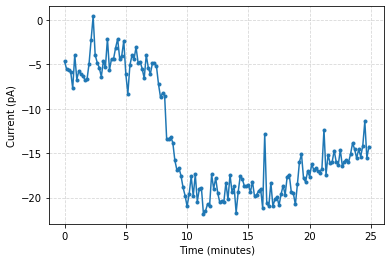

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

# start with sample holding current data
sweepCurrents = [-4.63465, -5.51081, -5.66655, -5.79674, -7.6818, -3.8968, -6.69579, -5.71098, -6.10336, 
                 -6.24999, -6.75877, -6.69165, -4.90577, -2.20656, 0.43463, -3.94292, -4.78706, -5.34989, 
                 -6.36574, -4.63652, -5.31478, -2.10792, -5.61191, -4.36993, -4.36985, -3.11592, -2.12315, 
                 -4.33662, -4.02691, -2.33449, -6.08645, -8.26997, -5.08048, -3.97689, -4.42698, -3.04758, 
                 -4.79167, -4.6762, -5.4704, -6.55669, -3.9469, -5.35243, -6.06626, -4.8891, -4.84388, 
                 -5.19486, -7.22855, -8.71245, -8.21538, -8.53336, -13.44261, -13.40911, -13.16543, -13.80675, 
                 -15.79994, -16.88096, -16.646, -17.51654, -18.83702, -19.76602, -20.98734, -19.5933, -17.60265, 
                 -19.83353, -17.38733, -20.43717, -18.97912, -18.89598, -21.83465, -21.5112, -20.73059, -20.95396, 
                 -17.39119, -19.00177, -17.78977, -19.49595, -20.53733, -20.35184, -20.44803, -18.31261, -20.20521,
                 -17.43426, -19.37423, -18.71905, -21.69927, -19.36978, -17.57406, -17.88728, -18.6616, -18.69261,
                 -18.60541, -19.35205, -18.19312, -19.84095, -19.69003, -19.24259, -19.01911, -21.18759, -12.80981,
                 -20.64312, -20.95864, -18.32492, -20.93545, -20.20677, -19.91784, -20.88027, -19.61825, -18.63966,
                 -19.68358, -17.61944, -17.39662, -19.35619, -19.50095, -20.77288, -18.49318, -15.97496, -15.10942,
                 -17.82308, -18.22963, -17.02892, -17.62901, -16.23215, -16.86382, -16.66236, -17.03443, -17.1747, 
                 -16.72648, -12.3339, -17.41958, -15.19357, -16.1032, -15.99566, -14.69315, -15.98535, -16.32571,
                 -14.60911, -16.44876, -15.93673, -15.74539, -16.03647, -15.1236, -13.85857, -14.54128, -15.55408, 
                 -14.56132, -15.37301, -14.16098, -11.41092, -15.53702, -14.24759]

# determine the times for data points
sweepPeriod = 10/60 # minutes
sweepTimes = np.arange(len(sweepCurrents)) * sweepPeriod

# plot the data
plt.plot(sweepTimes, sweepCurrents, '.-')
plt.grid(alpha=.5, ls='--')
plt.ylabel("Current (pA)")
plt.xlabel("Time (minutes)")
plt.show()

## Break Data into Segments

* Each segment will contain `windowSize` points
* There will be fewer segments than sweeps

In [2]:
def getMovingWindowSegments(data, windowSize):
    """
    Given a 1D list of data, slide a window along to create individual segments
    and return a list of lists (each of length windowSize)
    """
    segmentCount = len(data) - windowSize
    segments = [None] * segmentCount
    for i in range(segmentCount):
        segments[i] = data[i:i+windowSize]
    return segments

Make it easy for the user to define the window size!

In [3]:
windowSize = 12 # in sweeps
segments = getMovingWindowSegments(sweepCurrents, windowSize)
for segment in segments:
    print(segment)

[-4.63465, -5.51081, -5.66655, -5.79674, -7.6818, -3.8968, -6.69579, -5.71098, -6.10336, -6.24999, -6.75877, -6.69165]
[-5.51081, -5.66655, -5.79674, -7.6818, -3.8968, -6.69579, -5.71098, -6.10336, -6.24999, -6.75877, -6.69165, -4.90577]
[-5.66655, -5.79674, -7.6818, -3.8968, -6.69579, -5.71098, -6.10336, -6.24999, -6.75877, -6.69165, -4.90577, -2.20656]
[-5.79674, -7.6818, -3.8968, -6.69579, -5.71098, -6.10336, -6.24999, -6.75877, -6.69165, -4.90577, -2.20656, 0.43463]
[-7.6818, -3.8968, -6.69579, -5.71098, -6.10336, -6.24999, -6.75877, -6.69165, -4.90577, -2.20656, 0.43463, -3.94292]
[-3.8968, -6.69579, -5.71098, -6.10336, -6.24999, -6.75877, -6.69165, -4.90577, -2.20656, 0.43463, -3.94292, -4.78706]
[-6.69579, -5.71098, -6.10336, -6.24999, -6.75877, -6.69165, -4.90577, -2.20656, 0.43463, -3.94292, -4.78706, -5.34989]
[-5.71098, -6.10336, -6.24999, -6.75877, -6.69165, -4.90577, -2.20656, 0.43463, -3.94292, -4.78706, -5.34989, -6.36574]
[-6.10336, -6.24999, -6.75877, -6.69165, -4.9057

## Calculate Slope for Every Segment

Linear regression is used same way as before

In [8]:
import numpy
import scipy.stats

def getSingleSegmentSlope(segment, samplePeriod):
    """
    Return the slope of a linear line fitted to a single segment.
    Sample period must be in minutes, and returned slope will be pA/min.
    """
    xs = numpy.arange(len(segment)) * samplePeriod
    slope, intercept, r, p, stdErr = scipy.stats.linregress(xs, segment)
    return slope

def getAllSegmentSlopes(segments, samplePeriod):
    """
    Given a list of segments, return a list of slopes (one per segment).
    Sample period must be in minutes, and returned slopes will be pA/min.
    """
    slopes = []
    for segment in segments:
        slope = getSingleSegmentSlope(segment, samplePeriod)
        slopes.append(slope)
    return slopes

In [9]:
slopesBySegment = getAllSegmentSlopes(segments, sweepPeriod)
for slope in slopesBySegment:
    print(slope)

-0.7628465034965038
-0.16322706293706316
0.8317099300699299
2.255037902097902
2.376662097902098
1.7115948251748252
1.8274588111888113
1.0065037762237763
0.8393358041958042
0.3635513286713288
0.5547341958041958
-0.3752473426573425
-1.048432657342657
-1.3319561538461537
-0.6124491608391608
1.0946381118881119
1.2043667832167833
1.1718658741258743
1.34452993006993
0.24778678321678305
-0.8929586013986016
-1.3301953846153847
-0.64799013986014
-0.9468671328671329
-0.6384165734265733
-0.7879097202797203
-0.5510762937062935
-0.16129804195804176
-0.48543167832167805
-0.02968993006992973
0.5599107692307695
0.08814650349650381
-0.7083180419580419
-0.7663409790209789
-0.6143074825174827
-1.003235244755245
-1.2408530769230772
-1.6017365034965036
-1.860855944055944
-3.3076403496503493
-4.708456573426573
-5.053763916083916
-5.543603076923077
-6.333363356643355
-6.64314
-6.383207412587411
-5.924696643356642
-5.808561188811188
-5.824441678321678
-5.522814545454544
-4.4503212587412575
-3.7932801398601392

## Find Maximum Negative Slope

In [10]:
peakSlopeValue = slopesBySegment[0]
peakSlopeIndex = 0

for i in range(len(slopesBySegment)):
    if (slopesBySegment[i] < peakSlopeValue):
        peakSlopeValue = slopesBySegment[i]
        peakSlopeIndex = i

slopeTimeOffset = windowSize * sweepPeriod / 2
slopeTimes = np.arange(len(slopesBySegment)) * sweepPeriod + slopeTimeOffset
peakSlopeTime = slopeTimes[peakSlopeIndex]
windowSizeMinutes = windowSize * sweepPeriod

print(f"Peak negative slope ({windowSizeMinutes} minute window) " + 
      f"is {round(peakSlopeValue, 3)} pA/min " + 
      f"at {round(peakSlopeTime, 3)} min (index {peakSlopeIndex})")

Peak negative slope (2.0 minute window) is -6.643 pA/min at 8.333 min (index 44)


## Display Findings (Current & Slope vs. Time)

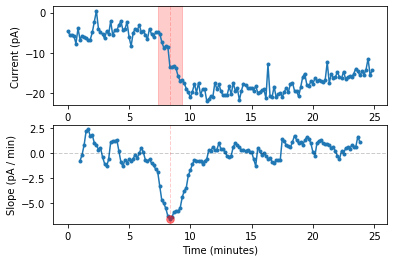

In [11]:
ax1 = plt.subplot(211)
plt.plot(sweepTimes, sweepCurrents, '.-')
plt.xlabel("Time (minutes)")
plt.ylabel("Current (pA)")
plt.axvline(peakSlopeTime, ls='--', color='r', lw=1, alpha=.2)

# highlight the window around the peak neagtive slope
halfWindowTime = (windowSize * sweepPeriod) / 2
plt.axvspan(peakSlopeTime - halfWindowTime, peakSlopeTime + halfWindowTime, color='r', alpha=.2)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(slopeTimes, slopesBySegment, '.-')
plt.plot(peakSlopeTime, peakSlopeValue, 'r.', ms=15, alpha=.5)
plt.xlabel("Time (minutes)")
plt.ylabel("Slope (pA / min)")
plt.axhline(0, ls='--', color='k', lw=1, alpha=.2)
plt.axvline(peakSlopeTime, ls='--', color='r', lw=1, alpha=.2)
plt.show()